In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
scales, acc_analog_qtest, acc_analog = np.loadtxt('res_both_qtrain_False.txt').T
scales2, acc_qtrain_qtest, acc_qtrain = np.loadtxt('res_both_qtrain_True.txt').T
# idx = np.argsort(scales)
# assert np.allclose(scales, scales2)
# acc_analog = acc_analog[idx]
# scales = scales[idx]
# acc_qtrain = acc_qtrain[idx]

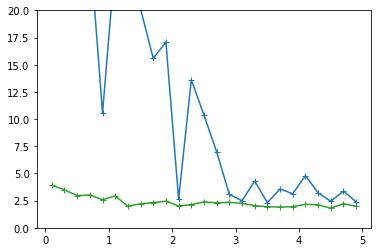

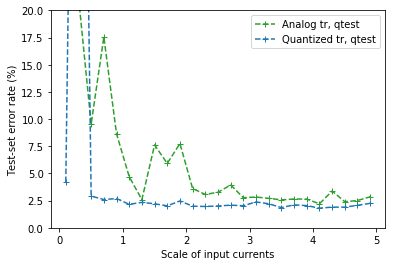

In [49]:
analog_err = 100*(1-acc_analog)
qtrain_err = 100*(1-acc_qtrain)
analog_err_q = 100*(1-acc_analog_qtest)
qtrain_err_q = 100*(1-acc_qtrain_qtest)

plt.plot(scales, analog_err , '+-', c='C2', label='Analog tr')
plt.plot(scales, qtrain_err, '+-', c='C0', label='Quantized tr')
plt.ylim([0., 20])

plt.figure()
plt.plot(scales, analog_err_q , '+--', c='C2', label='Analog tr, qtest')
plt.plot(scales, qtrain_err_q, '+--', c='C0', label='Quantized tr, qtest')
plt.legend()
plt.title('')
plt.ylim([0., 20])
plt.xlabel('Scale of input currents')
plt.ylabel('Test-set error rate (%)');

(0, 10)

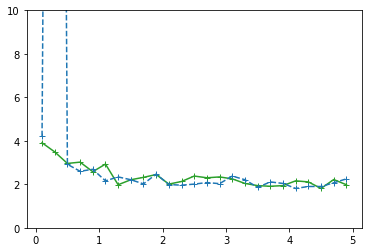

In [50]:
plt.plot(scales, analog_err , '+-', c='C2', label='Analog tr')
plt.plot(scales, qtrain_err_q, '+--', c='C0', label='Quantized tr, qtest')
plt.ylim([0, 10])

# Sinabs tests

In [91]:
scales, synops_analog, acc_analog_sinabs = np.loadtxt('results/sinabs_results_qtrain_False.txt').T
scales, synops_qtrain, acc_qtrain_sinabs = np.loadtxt('results/sinabs_results_qtrain_True.txt').T

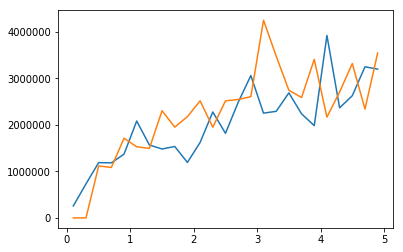

In [92]:
plt.plot(scales, synops_analog)
plt.plot(scales, synops_qtrain)

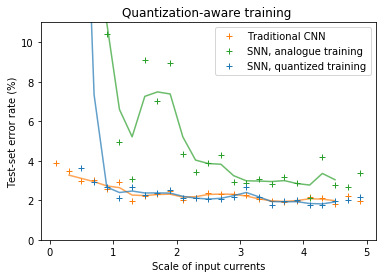

In [108]:
analog_err_sinabs = 100*(1-acc_analog_sinabs)
qtrain_err_sinabs = 100*(1-acc_qtrain_sinabs)

def smooth(y):
    box = [0.05, 0.2, 0.5, 0.2, 0.05]
    
    y_smooth = np.convolve(y, box, mode='same')
    y_smooth = y_smooth[1:-2]
    return y_smooth

plt.figure()
plt.plot(scales, analog_err, '+', c='C1', label='Traditional CNN')
plt.plot(smooth(scales), smooth(analog_err), '-', c='C1', alpha=0.7)

plt.plot(scales, analog_err_sinabs , '+', c='C2', label='SNN, analogue training')
plt.plot(smooth(scales), smooth(analog_err_sinabs), '-', c='C2', alpha=0.7)
plt.plot(scales, qtrain_err_sinabs, '+', c='C0', label='SNN, quantized training')
plt.plot(smooth(scales), smooth(qtrain_err_sinabs), '-', c='C0', alpha=0.7)
plt.legend()
plt.title('')
plt.ylim([0., 11])
plt.xlabel('Scale of input currents')
plt.ylabel('Test-set error rate (%)');
plt.title("Quantization-aware training ")
plt.savefig('quant-only.pdf', bbox_inches='tight')